In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import wordnet


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Filepaths
description_path = "description.txt"
test_data_path = "test_data.txt"
test_data_sol_path = "test_data_solution.txt"
train_data_path = "train_data.txt"


In [4]:
# Function to read txt file
def read_txt_file(filepath):
    with open(filepath, 'r') as file:
        content = file.read()
    return content

In [5]:
# Reading description file
description = read_txt_file(description_path)
print(description)

Train data:
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION

Test data:
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION

Source:
ftp://ftp.fu-berlin.de/pub/misc/movies/database/


Here we see that in order to create data frame we will use delimiter parameter ```sep=':::'``` in ```pd.read_csv()``` function.

In [6]:
# creating train_data dataframe

train_df = pd.read_csv(train_data_path, sep=':::', header=None, engine='python')

# Give columns comprehensive names
train_df.columns = ['Id','Title','Genre','Description']

print(train_df.info())
print(type(train_df))
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9560 entries, 0 to 9559
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           9560 non-null   int64 
 1   Title        9560 non-null   object
 2   Genre        9560 non-null   object
 3   Description  9560 non-null   object
dtypes: int64(1), object(3)
memory usage: 298.9+ KB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
# creating test_data dataframe

test_df = pd.read_csv(test_data_path, sep=':::', header=None, engine='python')

# Give columns comprehensive names
test_df.columns = ['Id','Title','Description']

print(test_df.info())
print(type(test_df))
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           9822 non-null   int64 
 1   Title        9822 non-null   object
 2   Description  9822 non-null   object
dtypes: int64(1), object(2)
memory usage: 230.3+ KB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [8]:
# creating test_data_solution dataframe

test_sol_df = pd.read_csv(test_data_sol_path, sep=':::', header=None, engine='python')

# Give columns comprehensive names
test_sol_df.columns = ['Id','Title','Genre','Description']

print(test_sol_df.info())
print(type(test_sol_df))
test_sol_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11303 entries, 0 to 11302
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           11303 non-null  int64 
 1   Title        11303 non-null  object
 2   Genre        11303 non-null  object
 3   Description  11303 non-null  object
dtypes: int64(1), object(3)
memory usage: 353.3+ KB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


# **DATA CLEANING**

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9560 entries, 0 to 9559
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           9560 non-null   int64 
 1   Title        9560 non-null   object
 2   Genre        9560 non-null   object
 3   Description  9560 non-null   object
dtypes: int64(1), object(3)
memory usage: 298.9+ KB


Here we see that ```Titles``` won't help in classifying the ```Genre``` as many of them are in other languages than English. So we will only use ```Description``` to extract features from.

In [10]:
# missing values
train_df.isnull().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

No missing value in the dataset

In [11]:
# check for duplicate values
train_df.duplicated().sum()

0

No duplicate values in the dataset

In [12]:
# output classes
output_categories = train_df.Genre.unique()
print(len(output_categories))
output_categories

27


array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [13]:
# Getting all the classes (Genres)
genres = train_df.Genre
print(genres)

0              drama 
1           thriller 
2              adult 
3              drama 
4              drama 
            ...      
9555     documentary 
9556           drama 
9557          comedy 
9558           drama 
9559     documentary 
Name: Genre, Length: 9560, dtype: object


In [14]:
# Label encoding the output categories
le = LabelEncoder()
le.fit(genres)
le.classes_

array([' action ', ' adult ', ' adventure ', ' animation ', ' biography ',
       ' comedy ', ' crime ', ' documentary ', ' drama ', ' family ',
       ' fantasy ', ' game-show ', ' history ', ' horror ', ' music ',
       ' musical ', ' mystery ', ' news ', ' reality-tv ', ' romance ',
       ' sci-fi ', ' short ', ' sport ', ' talk-show ', ' thriller ',
       ' war ', ' western '], dtype=object)

In [15]:
genres = le.transform(genres)
genres

array([ 8, 24,  1, ...,  5,  8,  7])

In [16]:
train_df['Labeled Genre'] = genres

In [17]:
train_df.head()

,Id,Title,Genre,Description,Labeled Genre
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


In [18]:
cat = le.inverse_transform([2])
# cat = str(cat)
print(cat[0])
print(type(cat[0]))

 adventure 
<class 'str'>


In [24]:
# print(cat)

# **PERFORMING EDA**

In [19]:
train_df.head()

,Id,Title,Genre,Description,Labeled Genre
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


In [20]:
train_df['Genre'].value_counts()

 drama           2365
 documentary     2307
 comedy          1308
 short            897
 horror           379
 thriller         313
 action           236
 western          194
 reality-tv       159
 family           138
 music            130
 adventure        129
 romance          114
 sci-fi           114
 adult            114
 animation         85
 sport             78
 crime             74
 talk-show         71
 fantasy           65
 mystery           56
 musical           52
 biography         47
 history           45
 game-show         37
 news              31
 war               22
Name: Genre, dtype: int64

In order to better visualize the distribution of output categories we plot the pie chart

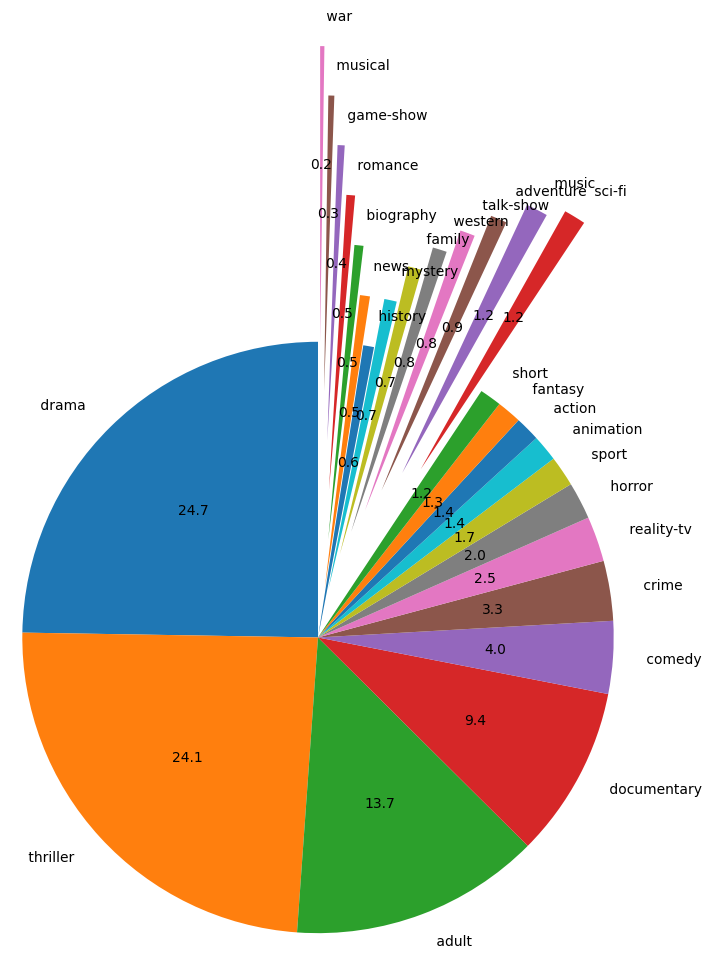

In [21]:
plt.figure(figsize=(8,8))
values = train_df['Genre'].value_counts()
plt.pie(values, labels=output_categories, autopct='%1.1f', startangle=90, radius=1.2, explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0.75, 0.65, 0.55, 0.45, 0.35, 0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2))
plt.show()

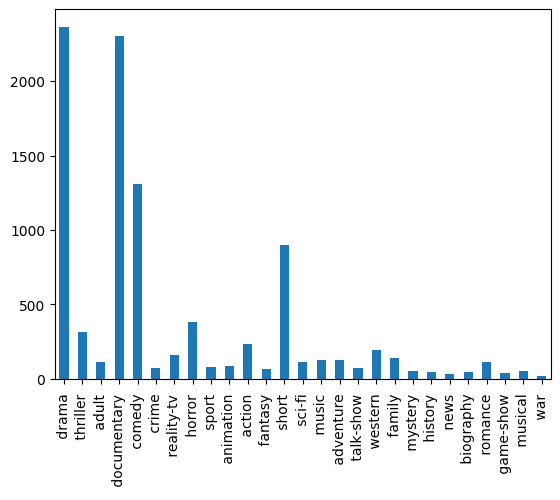

In [22]:
# Plotting the number of counts of each genre in the training set
train_df.Genre.value_counts()[train_df.Genre.unique()].plot(kind='bar')
plt.show()

From the above two visualizations we clearly see that the data is imbalanced

In [23]:
# Converting the Description column (Series type) to numpy array
desc = train_df['Description']
for _ in range(2):
    print(desc[_])
    print("\n")
desc_arr = np.array(desc.tolist())
print(type(desc_arr))

 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.


 A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.


<class 'numpy.ndarray'>


In [24]:
wordnet = WordNetLemmatizer()

In [25]:
def preprocess_text(text):
    # removing special characters & numbers and just keeping alphabets
    var = re.sub("[^a-zA-Z]", " ", text)

    # lowercasing
    var = var.lower()

    var = var.split()
    var = [wordnet.lemmatize(word) for word in var if not word in set(stopwords.words('english'))] # removing stopwords
    var = ' '.join(var)

    return var

In [26]:
print(train_df['Description'][0])
t = preprocess_text(train_df['Description'][0])
print("\n>>> After processing:")
t

 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.

>>> After processing:


'listening conversation doctor parent year old oscar learns nobody courage tell week live furious refuse speak anyone except straight talking rose lady pink meet hospital stair christmas approach rose us fantastical experience professional wrestler imagination wit charm allow oscar live life love full company friend pop corn einstein bacon childhood sweetheart peggy blue'

In [27]:
# Now applying the "preprocess_text" func. to the description column and adding a column which will contain the processed descriptions
train_df['Processed Description'] = train_df['Description'].apply(preprocess_text)

In [28]:
train_df.head()

,Id,Title,Genre,Description,Labeled Genre,Processed Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listening conversation doctor parent year old ...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,film title refers un recovered body ground zer...


In [29]:
from wordcloud import WordCloud
wc = WordCloud(width=300, height=300, min_font_size=10, background_color='white')

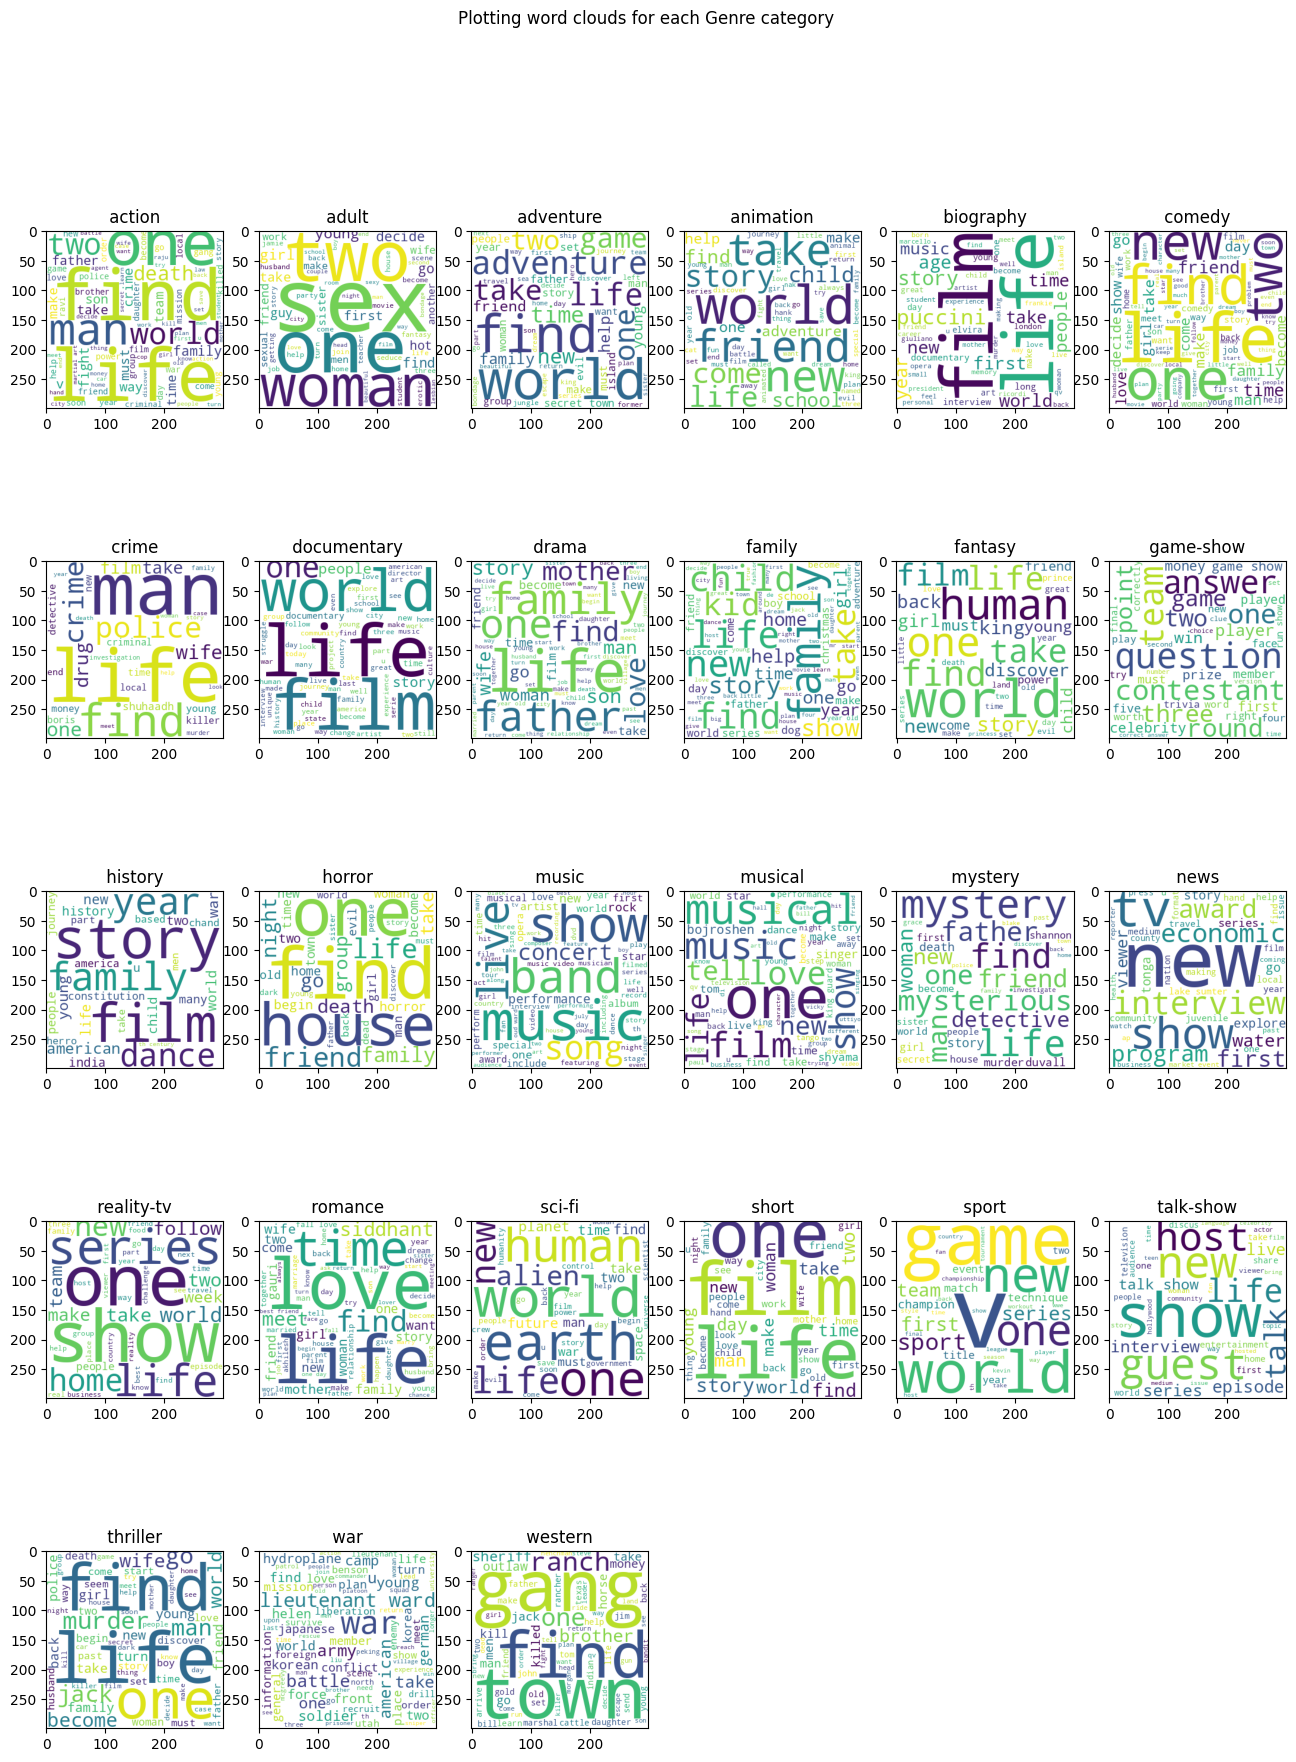

In [30]:
fig, axs = plt.subplots(nrows=5, ncols=6,figsize=(16,20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Plotting word clouds for each Genre category')

for i in range(len(train_df['Genre'].unique())):
    ax = axs[i//6,i%6]
    cloud = wc.generate(train_df[train_df['Labeled Genre'] == i]['Processed Description'].str.cat(sep=" "))
#     plt.figure(figsize=(8,4))
    ax.imshow(cloud)
    ax.set_title(le.inverse_transform([i])[0])

# Hide any remaining empty subplots
for i in range(len(train_df['Genre'].unique()), 5*6):
    axs.flatten()[i].axis('off')

plt.show()

In [31]:
# Now building a corpus which will be a 2d list with 27 rows one row for each genre's description corpus
corpus = []
for i in range(len(train_df['Genre'].unique())):
    corpus_i = []
    for desc in train_df[train_df['Labeled Genre'] == i]['Processed Description'].tolist():
        for word in desc.split():
            corpus_i.append(word)
    corpus.append(corpus_i)


# the length of corpus should be 27
print(len(corpus))

27


In [32]:
from collections import Counter

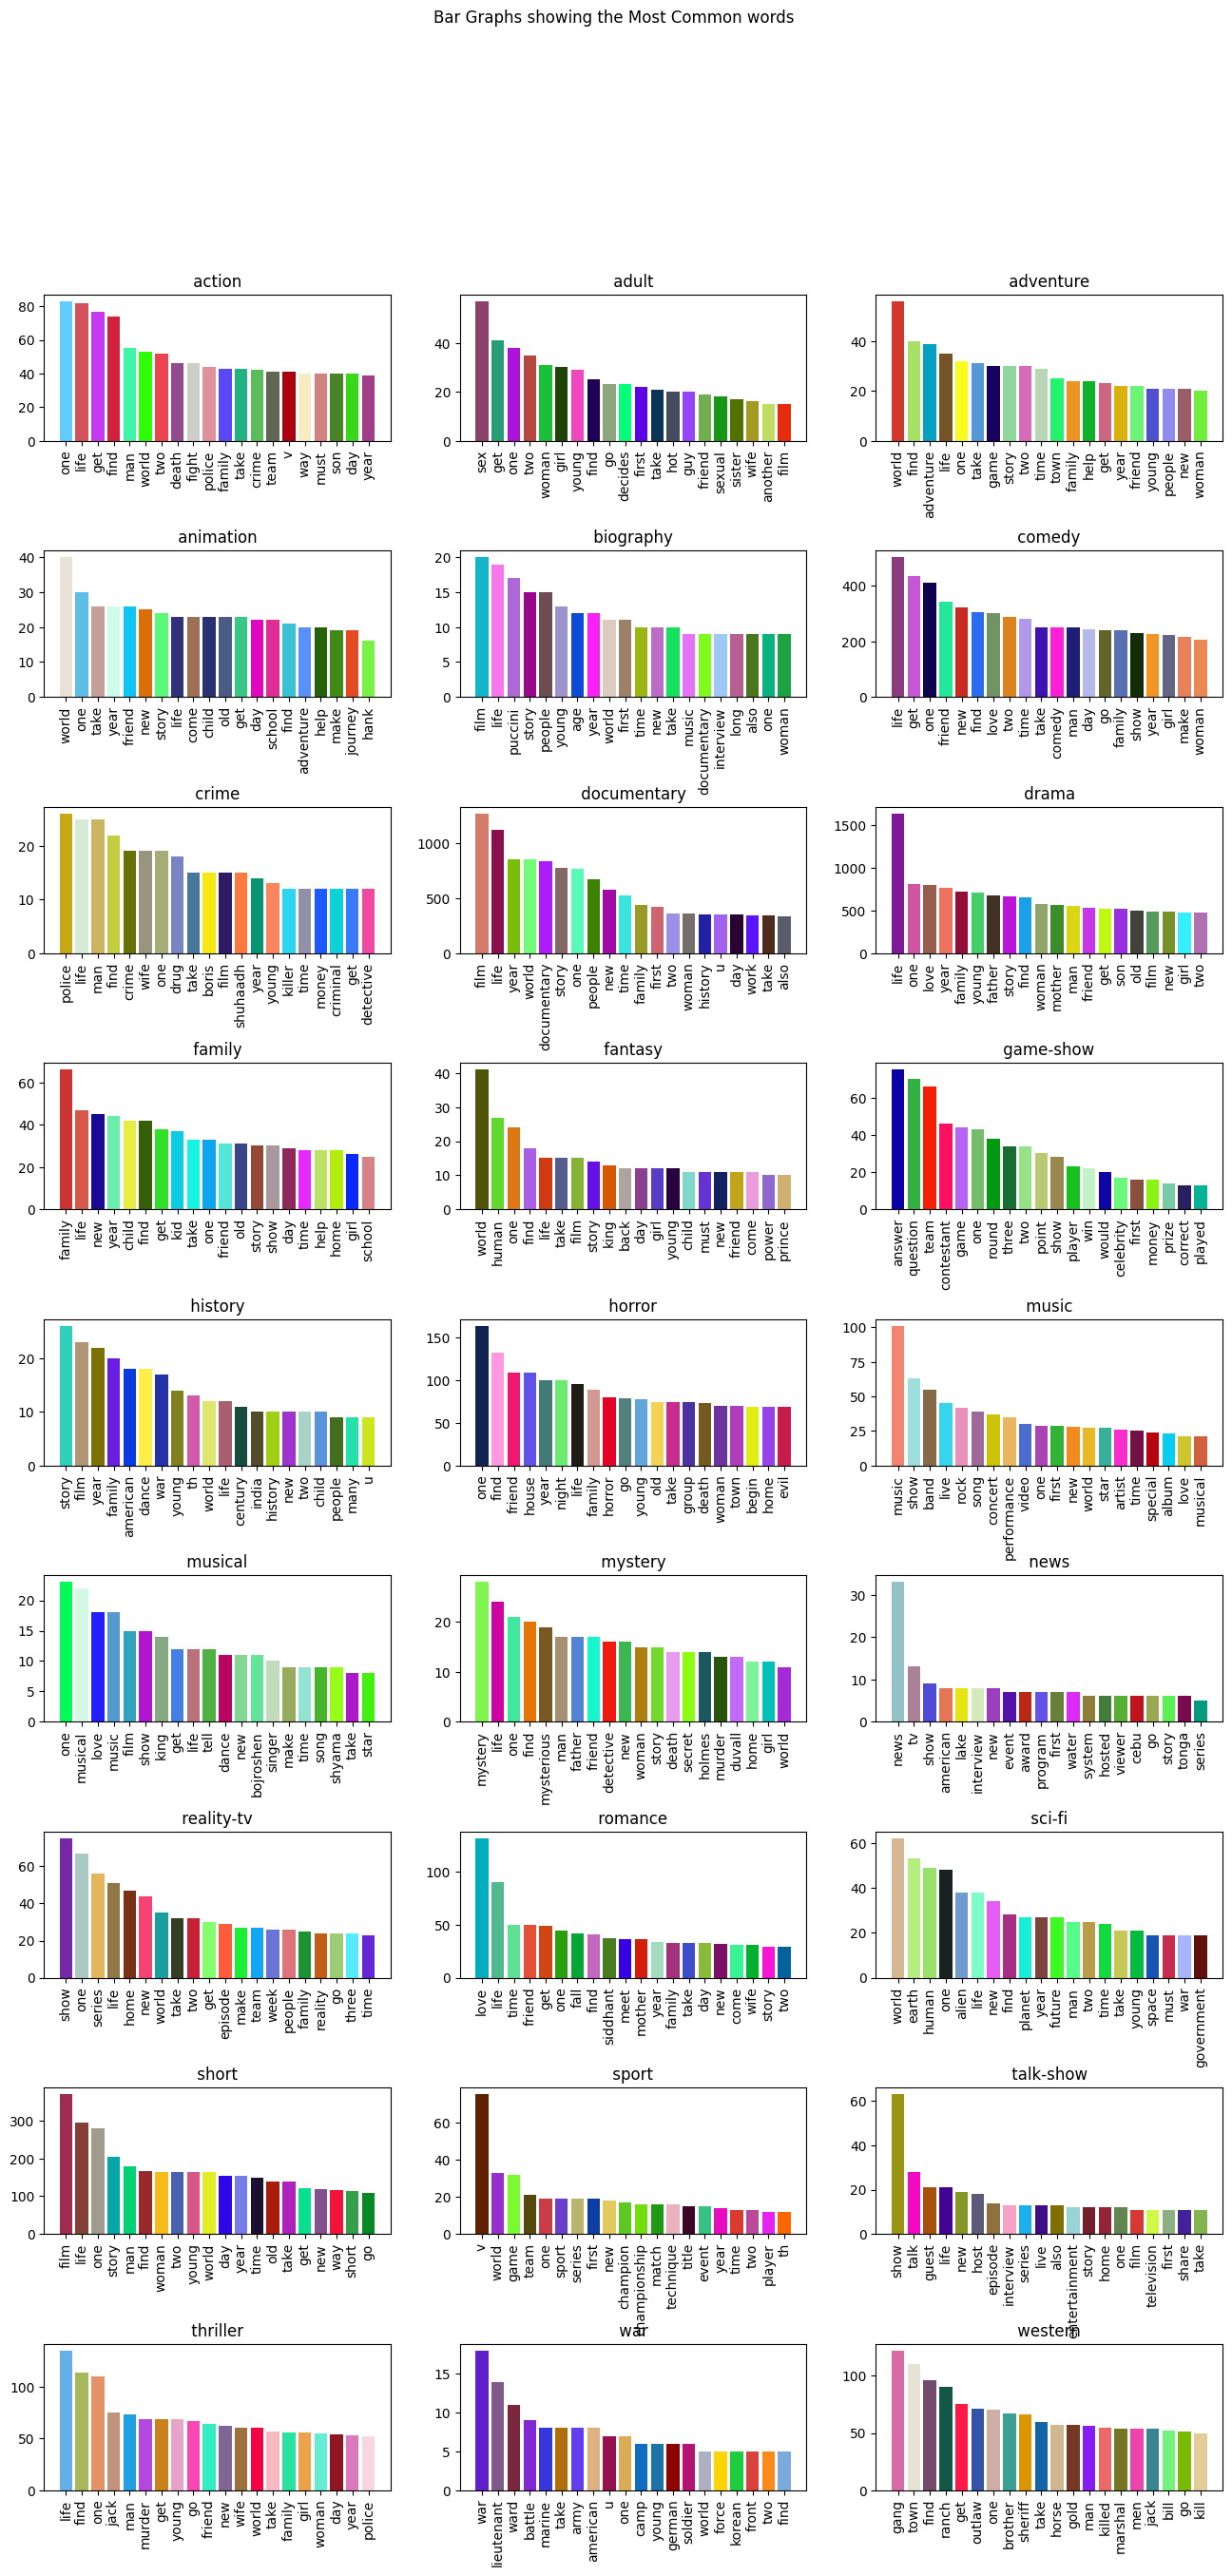

In [33]:
fig, axs = plt.subplots(nrows=9, ncols=3,figsize=(16,30))
plt.subplots_adjust(hspace=0.75)
fig.suptitle('Bar Graphs showing the Most Common words')

for i, l in enumerate(corpus):
    colors = np.random.rand(20, 3)
    ax = axs[i//3,i%3]
    df = pd.DataFrame(Counter(l).most_common(20))
    ax.bar(df[0], df[1], color=colors)
    ax.set_title(le.inverse_transform([i])[0])

    # Setting tick positions and labels
    ax.set_xticks(np.arange(len(df[0])))
    ax.set_xticklabels(df[0].tolist(),rotation=90)

plt.xticks(rotation='vertical')
plt.show()

# **BUILDING THE MODEL**

In [34]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [35]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [36]:
# wv = api.load('word2vec-google-news-300')
# wv.save('/content/drive/MyDrive/Colab Notebooks/vectors.kv')

In [37]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('/content/drive/MyDrive/Colab Notebooks/vectors.kv')

In [38]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [39]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)

    i = 0
    for w in sent.split():
        if w in wv:
            i += 1
            wv_res += wv[w]
    wv_res = wv_res/i
    return wv_res

In [40]:
train_df['Vectorized'] = train_df['Processed Description'].apply(sent_vec)

In [41]:
train_df.head()

,Id,Title,Genre,Description,Labeled Genre,Processed Description,Vectorized
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listening conversation doctor parent year old ...,"[-0.004000681751179245, -0.006050397764961675,..."
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestuous relationship cu...,"[-0.027899169921875, -0.004243977864583333, 0...."
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bus empty student field trip museum natural hi...,"[0.07709503173828125, -0.007526397705078125, -..."
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemployed father make end meet edith twi...,"[0.023535634957107844, -0.0003737187853046492,..."
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,film title refers un recovered body ground zer...,"[0.08973750361689815, 0.006486398202401621, 0...."


In [42]:
X = train_df['Vectorized'].tolist()
y = train_df['Labeled Genre'].tolist()

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [44]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression

In [45]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
lg = LogisticRegression(multi_class='ovr')

In [51]:
# mnb.fit(X_train,y_train)
gnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
lg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [52]:
y_pred = lg.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,y_test)*100,"%")
print("Precision:", precision_score(y_pred, y_test, average='weighted')*100,"%")

Accuracy:  52.03974895397489 %
Precision: 70.10948230553635 %


In [53]:
y_pred = gnb.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,y_test)*100,"%")
print("Precision:", precision_score(y_pred, y_test, average='weighted')*100,"%")

Accuracy:  35.66945606694561 %
Precision: 42.6830201715577 %


In [54]:
y_pred = bnb.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,y_test)*100,"%")
print("Precision:", precision_score(y_pred, y_test, average='weighted')*100,"%")

Accuracy:  38.85983263598327 %
Precision: 41.18774772077111 %


***Result***
---
As the dataset was very imbalanced so prcision matters more than accuracy. And we see that the LogisticRegression model is performing better than others with 70% precision. So we'll go with that.
---



